<a href="https://colab.research.google.com/github/YousraAshour/DryBeans_Competition/blob/main/DryBeans_Trial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

In [12]:
!pip install catboost
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from plotnine import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from lightgbm import *
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
df = pd.read_csv('/content/train.csv',index_col='ID')

In [14]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI


In [15]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,200705.420000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1716.551280,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,653.014248,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,400.636925,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.248644,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.895673,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,203320.565000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,505.515655,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.830903,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.993309,0.994677


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [17]:
df.duplicated(subset=None, keep='first').sum()

0

In [18]:
# print(df['y'].value_counts())
# _ = sns.countplot(x='y', data=df)

In [19]:
Numeric_cols = df.drop(columns=['y']).columns

# fig, ax = plt.subplots(4, 4, figsize=(15, 12))
# for variable, subplot in zip(Numeric_cols, ax.flatten()):
#     g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
#     g.lines[0].set_color('crimson')
#     g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
# plt.tight_layout()

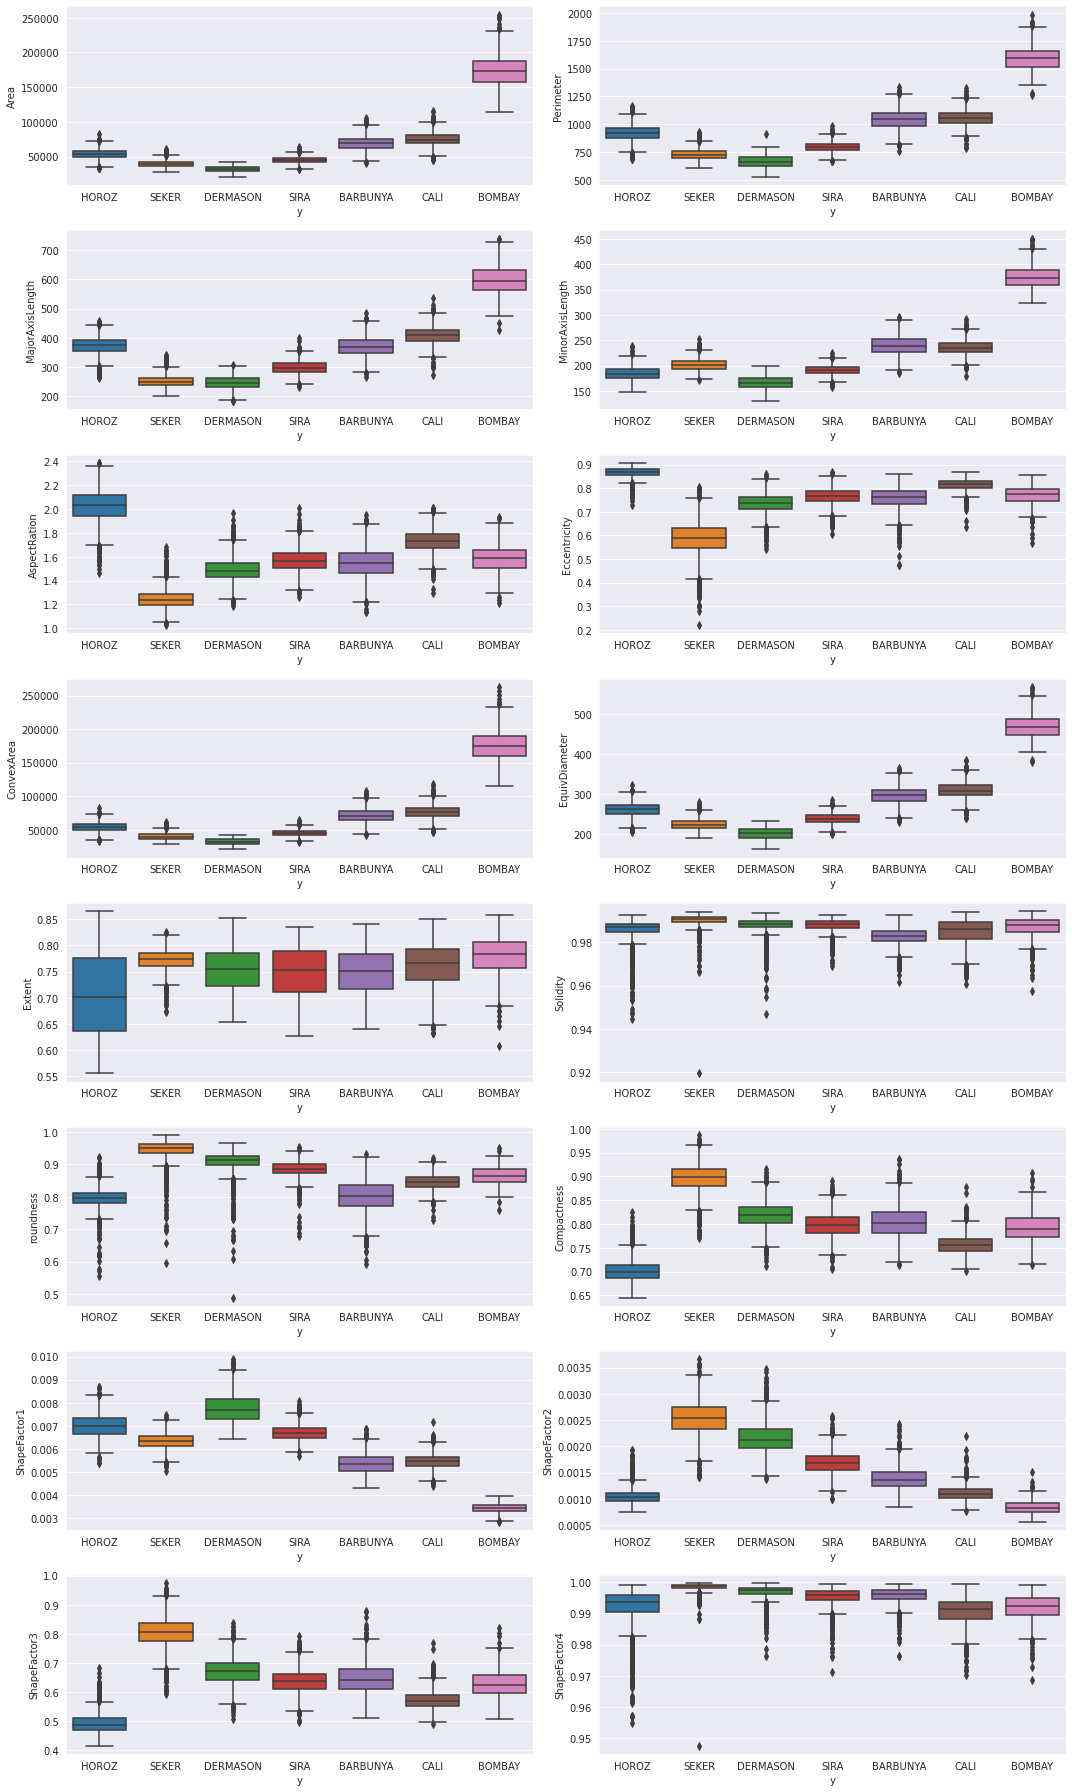

In [20]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['y'], y= df[variable], ax=subplot)
plt.tight_layout()

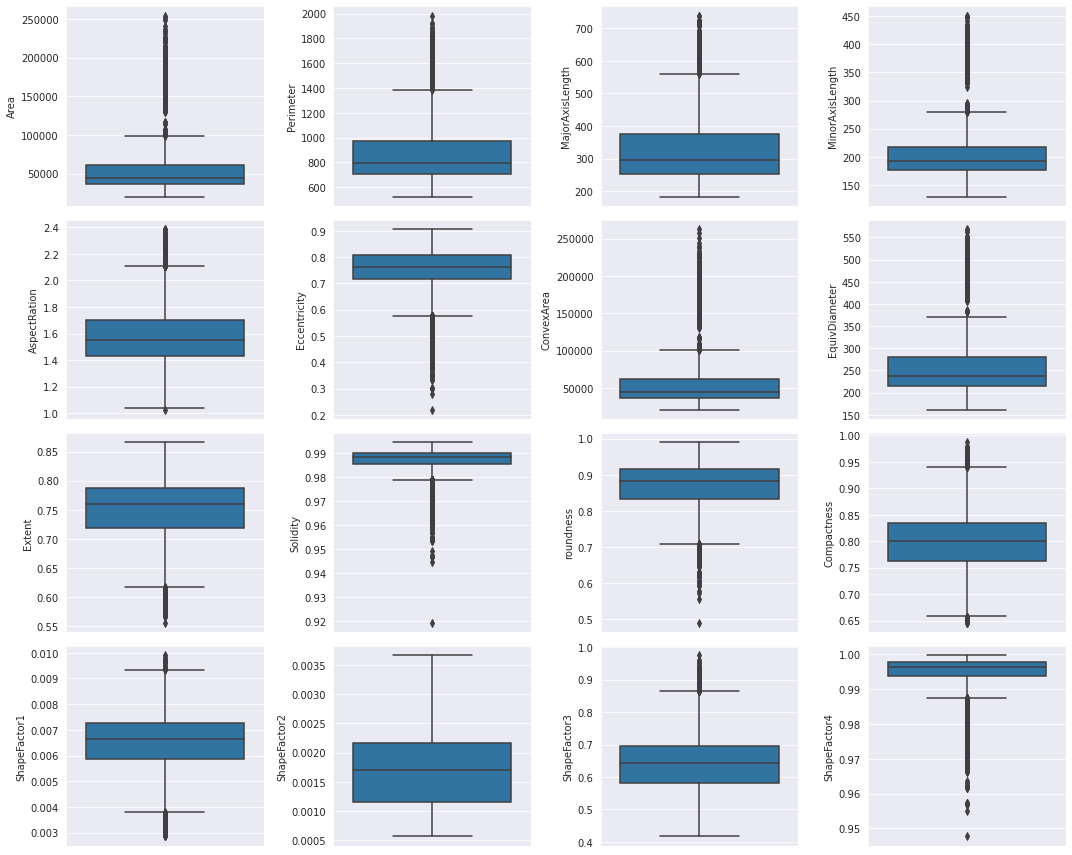

In [21]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

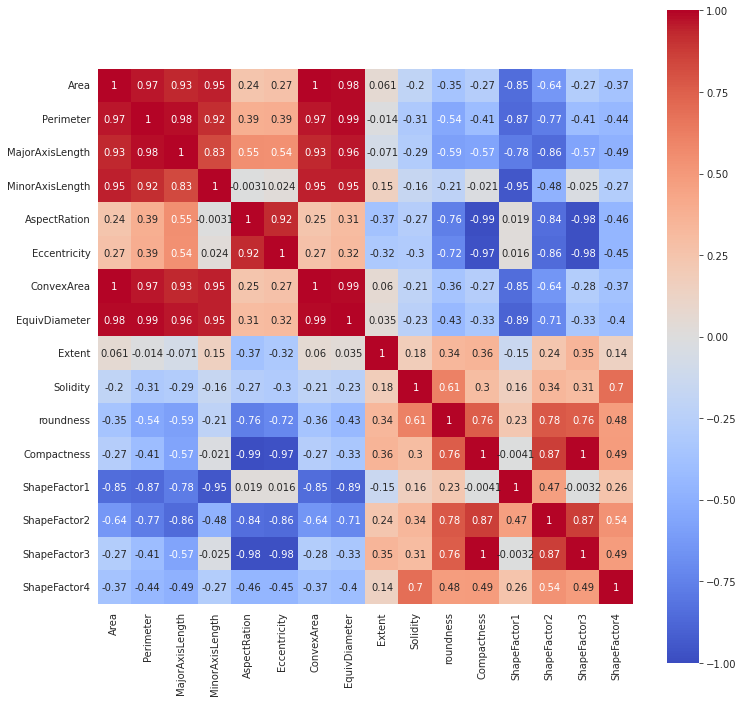

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [23]:
df['Bounding_rectangular_area'] = df['Area']/df['Extent']

In [24]:
le = preprocessing.LabelEncoder()
df['y'] = le.fit_transform(df['y'])

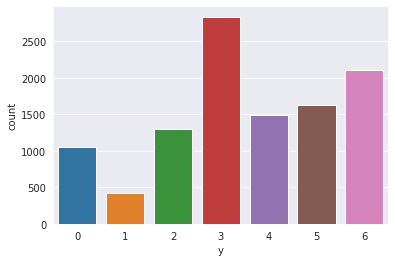

In [25]:
_ = sns.countplot(x='y', data=df)

In [26]:
features = df.drop(columns=['y']).columns
train_df, val_df = train_test_split(df, test_size=0.05, random_state=42, stratify = df['y'])

In [27]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [28]:
X_train = train_df[features]
y_train = train_df['y']

X_val = val_df[features]
y_val = val_df['y']

In [29]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity','Bounding_rectangular_area']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

In [30]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

Train F1_Score:  0.9421431349669389
Val F1_Score:  0.9391143911439115


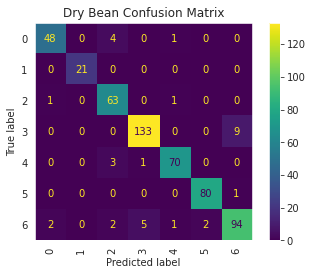

In [31]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9613963438350837
Val F1_Score:  0.9298892988929889


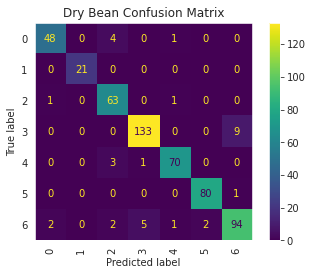

In [32]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_xgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.5747513	total: 77ms	remaining: 46.1s
1:	learn: 1.3354895	total: 99.7ms	remaining: 29.8s
2:	learn: 1.1746783	total: 122ms	remaining: 24.3s
3:	learn: 1.0444295	total: 146ms	remaining: 21.7s
4:	learn: 0.9482163	total: 168ms	remaining: 20s
5:	learn: 0.8681159	total: 191ms	remaining: 18.9s
6:	learn: 0.7948639	total: 216ms	remaining: 18.3s
7:	learn: 0.7325627	total: 237ms	remaining: 17.6s
8:	learn: 0.6791659	total: 259ms	remaining: 17s
9:	learn: 0.6351819	total: 286ms	remaining: 16.9s
10:	learn: 0.5952145	total: 309ms	remaining: 16.5s
11:	learn: 0.5609732	total: 331ms	remaining: 16.2s
12:	learn: 0.5314357	total: 352ms	remaining: 15.9s
13:	learn: 0.5052377	total: 374ms	remaining: 15.7s
14:	learn: 0.4810385	total: 396ms	remaining: 15.5s
15:	learn: 0.4587019	total: 418ms	remaining: 15.2s
16:	learn: 0.4393688	total: 439ms	remaining: 15.1s
17:	learn: 0.4214110	total: 461ms	remaining: 14.9s
18:	learn: 0.4055666	total: 483ms	remaining: 14.8s
19:	learn: 0.3914296	total: 508ms	remaining: 

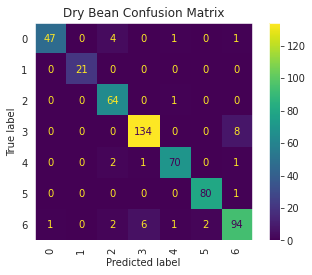

In [33]:
model_cb= cb.CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=4, iterations=600, depth= 6)

model_cb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_cb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_cb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_cb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.940101127965772
Val F1_Score:  0.933579335793358


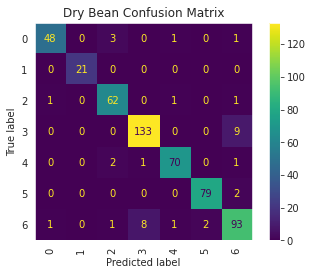

In [34]:
model_lgb = lgb.LGBMClassifier(random_state=42,silent=True,subsample=0.8, reg_lambda=0.1,reg_alpha=1, num_leaves=5, 
                             n_estimators=100, min_child_samples=5, max_depth=5, learning_rate=0.12, 
                             colsample_bytree=0.5, boosting_type='goss', metric='multi_error', num_class=7)

model_lgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_lgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_lgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9418514196810579
Val F1_Score:  0.933579335793358


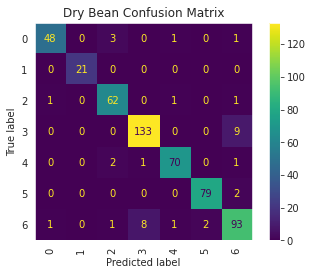

In [35]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_lgb, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

0:	learn: 1.5747513	total: 28.3ms	remaining: 16.9s
1:	learn: 1.3354895	total: 50.2ms	remaining: 15s
2:	learn: 1.1746783	total: 72.1ms	remaining: 14.3s
3:	learn: 1.0444295	total: 94.6ms	remaining: 14.1s
4:	learn: 0.9482163	total: 119ms	remaining: 14.2s
5:	learn: 0.8681159	total: 143ms	remaining: 14.1s
6:	learn: 0.7948639	total: 164ms	remaining: 13.9s
7:	learn: 0.7325627	total: 185ms	remaining: 13.7s
8:	learn: 0.6791659	total: 207ms	remaining: 13.6s
9:	learn: 0.6351819	total: 233ms	remaining: 13.8s
10:	learn: 0.5952145	total: 255ms	remaining: 13.7s
11:	learn: 0.5609732	total: 289ms	remaining: 14.1s
12:	learn: 0.5314357	total: 311ms	remaining: 14s
13:	learn: 0.5052377	total: 333ms	remaining: 13.9s
14:	learn: 0.4810385	total: 355ms	remaining: 13.8s
15:	learn: 0.4587019	total: 377ms	remaining: 13.8s
16:	learn: 0.4393688	total: 399ms	remaining: 13.7s
17:	learn: 0.4214110	total: 421ms	remaining: 13.6s
18:	learn: 0.4055666	total: 446ms	remaining: 13.6s
19:	learn: 0.3914296	total: 469ms	remaini

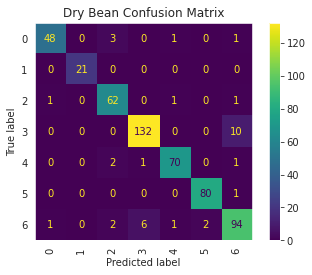

In [36]:
voting_model = VotingClassifier(estimators=[('xgb', model_xgb), ('lgb', model_lgb),('mlp', model_mlp),
                                            ('cb', model_cb)], voting='soft')

voting_model.fit(X_train, y_train)

print("F1_Score: ", metrics.f1_score(y_val, voting_model.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(voting_model, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()

In [37]:
for clf in (model_svc, model_lgb, model_xgb, model_mlp, model_cb, voting_model):
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, metrics.f1_score(y_val, y_pred, average='micro'))

SVC 0.933579335793358
LGBMClassifier 0.933579335793358
XGBClassifier 0.9298892988929889
MLPClassifier 0.9391143911439115
CatBoostClassifier 0.940959409594096
VotingClassifier 0.9354243542435424


# Test

In [38]:
from google.colab import files


In [39]:
test_df = pd.read_csv('/content/test.csv')
X_test = test_df.drop(columns=['ID'])

X_test['Bounding_rectangular_area'] = X_test['Area']/X_test['Extent']


X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)


X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                              'Perimeter','AspectRation'])

y_test_pred = model_cb.predict(X_test)

In [40]:
test_df['y'] = le.inverse_transform(y_test_pred)
test_df[['ID', 'y']].to_csv('trial_3.csv', index=False)

files.download('trial_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>